# CPSC 330 - Applied Machine Learning 

## Homework 9: Communication

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

<br><br><br><br>

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

<br><br><br><br>

## Exercise 1: Survival analysis
<hr>

rubric={points:6}

The following questions pertain to Lecture 21 on survival analysis. We'll consider the use case of customer churn analysis.

1. What is the problem with simply labeling customers are "churned" or "not churned" and using standard supervised learning techniques?
2. Consider customer A who just joined last week vs. customer B who has been with the service for a year. Who do you expect will leave the service first: probably customer A, probably customer B, or we don't have enough information to answer? Briefly explain your answer. 
3. If a customer's survival function is almost flat during a certain period, how do we interpret that?

1. The problem with simply labeling customers as "churned" or "not churned" and using standard supervised learning techniques is that it does not really achieve useful predictions for our problem. Instead of identifying what customers have churned or not, what is more important is knowing *when* a customer is likely to churn, so we can send notifications, give promotions, etc. as our ultimate goal is to mitigate the amount of customers who churn.
2. In this situation, we do not have enough information to answer. It is extremely difficult to determine which customer is more likely to churn simply based on how long ago they joined the service, as there are various other factors that could be affecting the result.
3. If a customer’s survival function is almost flat (it means that the probability of the customer "surviving" (i.e., not churning) during that time remains nearly constant.), it means the customer is not likely to leave during that time.

<br><br><br><br>

## Exercise 2: Communication
<hr>

### 2.1 Blog post 
rubric={points:26}

Write up your analysis from hw5 or any other assignment or your side project on machine learning in a "blog post" or report format. It's fine if you just write it here in this notebook. Alternatively, you can publish your blog post publicly and include a link here. (See exercise 2.3.) The target audience for your blog post is someone like yourself right before you took this course. They don't necessarily have ML knowledge, but they have a solid foundation in technical matters. The post should focus on explaining **your results and what you did** in a way that's understandable to such a person, **not** a lesson trying to teach someone about machine learning. Again: focus on the results and why they are interesting; avoid pedagogical content.

Your post must include the following elements (not necessarily in this order):

- Description of the problem/decision.
- Description of the dataset (the raw data and/or some EDA).
- Description of the model.
- Description your results, both quantitatively and qualitatively. Make sure to refer to the original problem/decision.
- A section on caveats, describing at least 3 reasons why your results might be incorrect, misleading, overconfident, or otherwise problematic. Make reference to your specific dataset, model, approach, etc. To check that your reasons are specific enough, make sure they would not make sense, if left unchanged, to most students' submissions; for example, do not just say "overfitting" without explaining why you might be worried about overfitting in your specific case.
- At least 3 visualizations. These visualizations must be embedded/interwoven into the text, not pasted at the end. The text must refer directly to each visualization. For example "as shown below" or "the figure demonstrates" or "take a look at Figure 1", etc. It is **not** sufficient to put a visualization in without referring to it directly.

A reasonable length for your entire post would be **800 words**. The maximum allowed is **1000 words**.

#### Example blog posts

Here are some examples of applied ML blog posts that you may find useful as inspiration. The target audiences of these posts aren't necessarily the same as yours, and these posts are longer than yours, but they are well-structured and engaging. You are **not required to read these** posts as part of this assignment - they are here only as examples if you'd find that useful.

From the UBC Master of Data Science blog, written by a past student:

- https://ubc-mds.github.io/2019-07-26-predicting-customer-probabilities/

This next one uses R instead of Python, but that might be good in a way, as you can see what it's like for a reader that doesn't understand the code itself (the target audience for your post here):

- https://rpubs.com/RosieB/taylorswiftlyricanalysis

Finally, here are a couple interviews with winners from Kaggle competitions. The format isn't quite the same as a blog post, but you might find them interesting/relevant:

- https://medium.com/kaggle-blog/instacart-market-basket-analysis-feda2700cded
- https://medium.com/kaggle-blog/winner-interview-with-shivam-bansal-data-science-for-good-challenge-city-of-los-angeles-3294c0ed1fb2


#### A note on plagiarism

You may **NOT** include text or visualizations that were not written/created by you. If you are in any doubt as to what constitutes plagiarism, please just ask. For more information see the [UBC Academic Misconduct policies](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,959). Please don't copy this from somewhere or ask Generative AI to write it for you 🙏. 

<br><br>

In [5]:
from IPython.display import Image

# **Credit Card Default Analysis**
#### by Angela Li and Elly Kim  
 Dec. 6, 2024
<hr>

### **The Problem**: 
#### Got 99 Problems and Here’s One

Knowing if an individual’s credit card will default is indispensable for mitigating financial losses and making informed decisions. This is crucial not only for banks and financial institutions, but also for cardholders aiming to maintain a good credit standing, as well as investors assessing financial risks.
To address this issue, we chose to work on a binary classification problem: predicting whether a credit card client will default on their payments.

#### Overview
Our main goals and process for this analysis are as follows:
1) *Exploratory Data Analysis: Uncovering Trends and Patterns*  
    - We investigated the data to understand its structure, visualize relationships between features, and identify patterns that could influence predictions.
2) *Building the Model: Predicting Credit Defaults*  
    - We developed a classification model aiming to predict whether a client will default on their credit card payments.
3) *Evaluating the Model: How Did We Do?*  
    - We assessed our model's performance using metrics like F1 score, as well as determining interpretability with SHAP.
4) *Reflecting on the Process: What Did We Learn?*  
    - We reviewed the model's performance, identifying areas for improvement and potential directions for further analysis.

### **The Data**: 
#### First, from Afar…

We used the Default of Credit Card Clients dataset, which contains information on credit card clients in Taiwan from April to September 2005. This dataset contains 30,000 examples and 24 features with no empty values, including demographic data (e.g., age, gender, marital status, and education), financial history (e.g. credit limit, payment history, and bill statements), and the target variable, default.payment.next.month (1 = default, 0 = no default).

#### Now, Up Close & Personal

After a brief overview of the data, we performed EDA(Exploratory Data Analysis) where we investigated the data further and looked for patterns. A few interesting findings we noticed were:

- The repayment statuses for every month and bill amounts for every month are strongly correlated. In the image below, we can see that the dark blue areas indicate a high correlation between two variables, while the lighter colors represent low or no correlation.

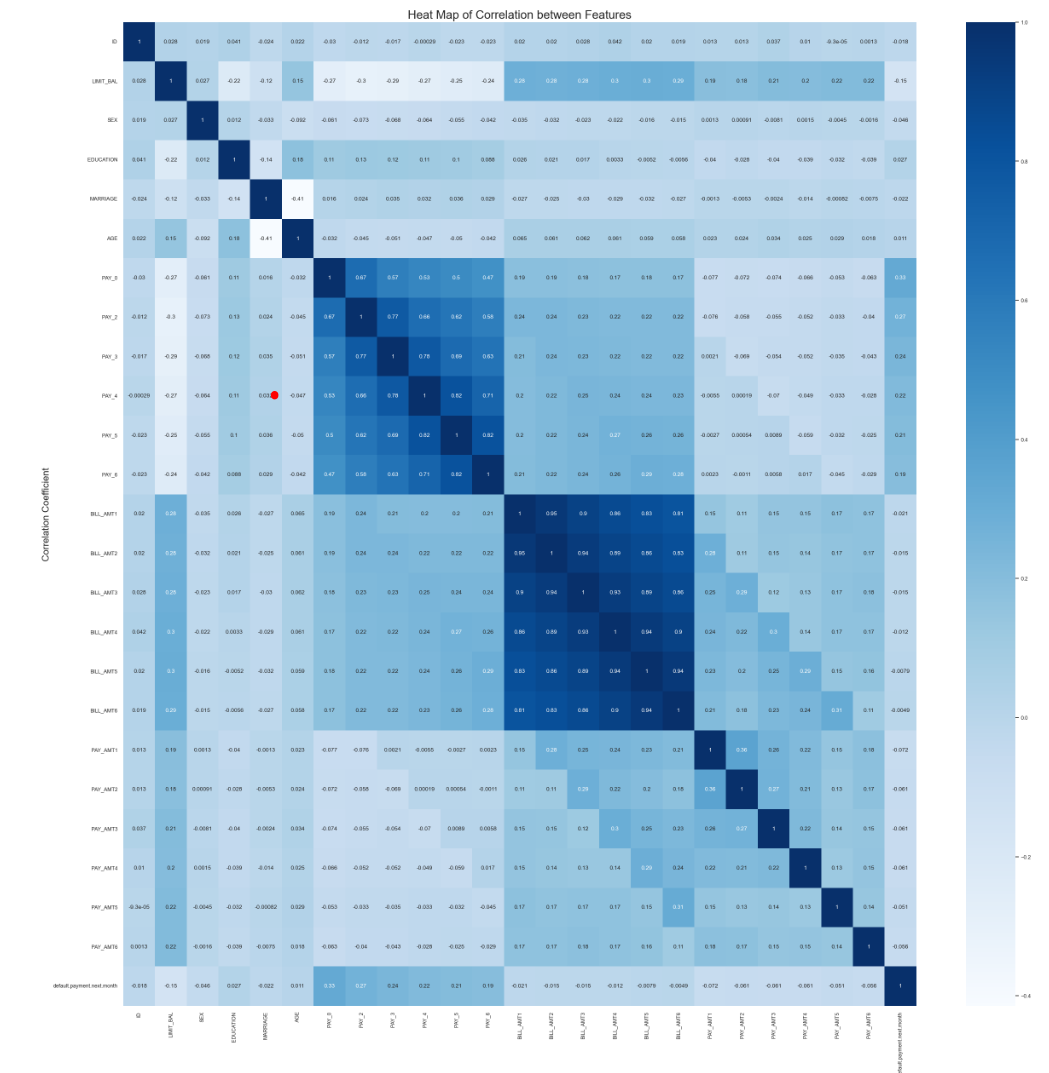

In [4]:
Image("img/correlation.png")

- Class imbalance: Shown in the below image, there is a notable class imbalance in the target feature. There are significantly less defaults (blue-grey) in the dataset compared to non-defaults (red). 

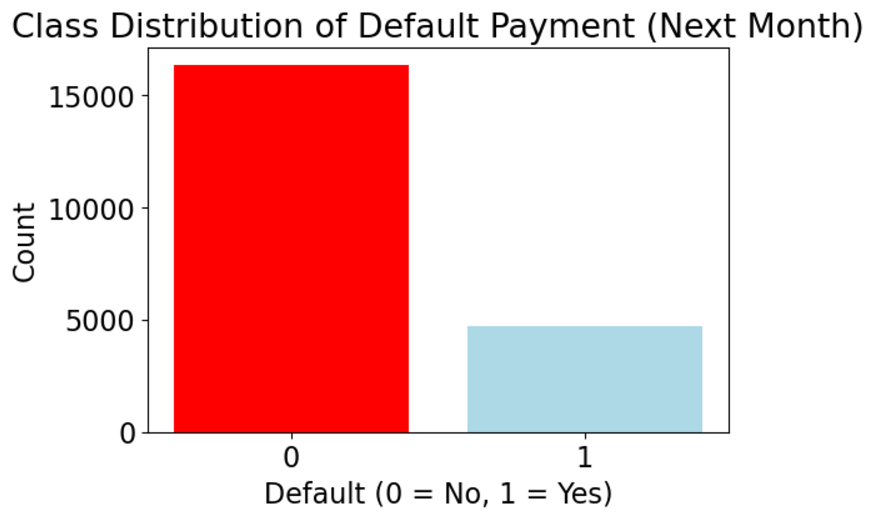

In [7]:
Image("img/class_imb.png")

- Outliers: In the histograms below, we can see some data points that are different from the majority of other observations in the dataset.

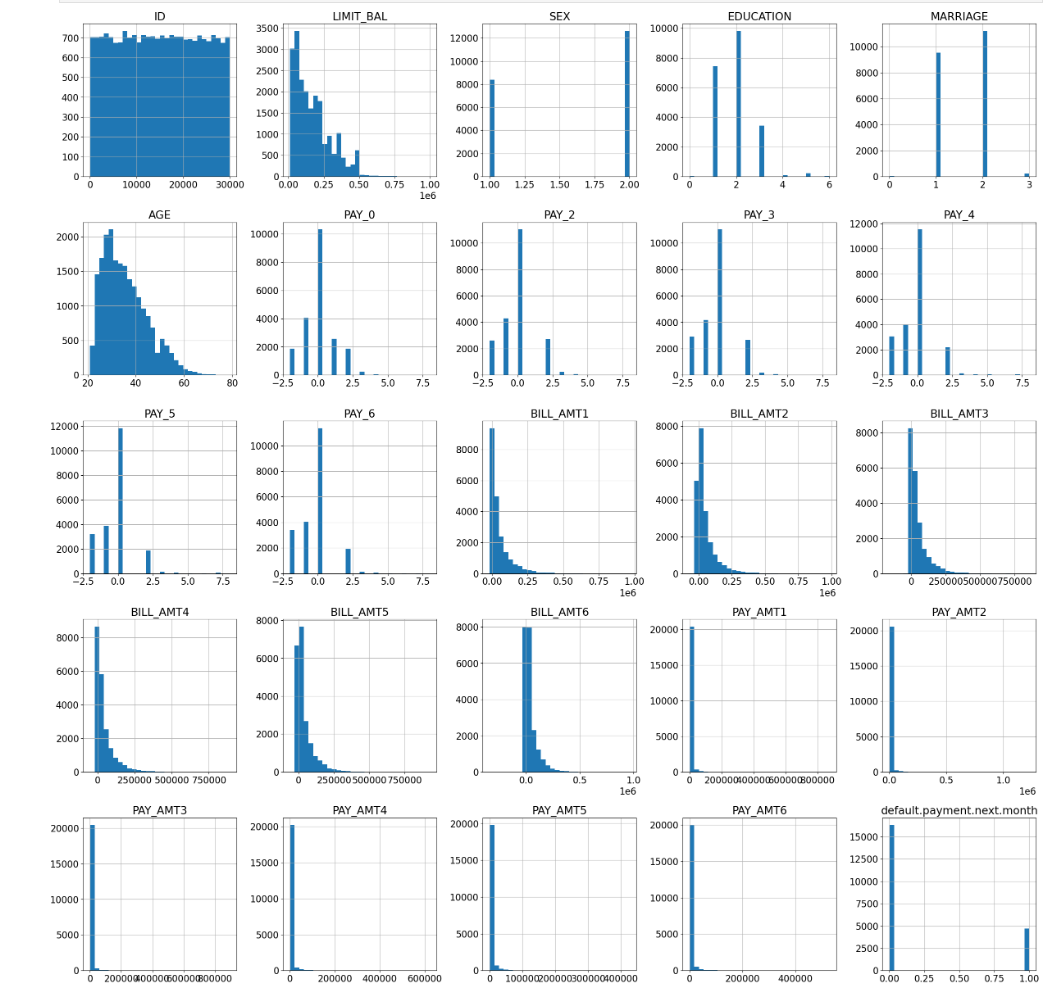

In [8]:
Image("img/histograms.png")

### **The Model**: 

To predict whether a credit card client will default,  we tried several different models and evaluated for the optimal one. Out of the models we tried, some of the best-performing were RandomForest, XGBoost, and LightGBM. Of the three, we ultimately chose LightGBM as our model because it performed the best and was the least computationally expensive.
We used 70% of the data for training and 30% for testing to ensure fair evaluation. While we explored feature selection to simplify the data, it didn’t lead to significant improvements. Instead, we focused on optimizing the chosen model to enhance its accuracy.

### **The Results** (…Drumroll, Please!):

#### Quantitative Analysis 

Because of the previously mentioned class imbalance discovered in EDA, we used macro-average F1 score, a method of communicating precision and recall together as a single metric, for our evaluation metric. 

When tested on completely new, unseen data, our model obtained a score of 0.707, meaning the model is moderately good at making predictions that correctly label clients who are likely to default while avoiding predictions that incorrectly label non-defaulters as defaulters.

Here, we show the model’s confusion matrix when tested. As we can see, the model is accurately identifying somewhat-over half of the total defaults in the testing dataset, and does not incorrectly label non-defaulters as defaulters for a majority of the total non-defaulters.



#### Qualitative Analysis

Using SHAP(SHapley Additive exPlanations -  which tells us how much that feature pushed the model’s output higher or lower), we discovered that what most significantly drives our model’s predictions are the client’s most recent repayment statuses (Pay_0: September), and amount of given credit in NT dollars (LIMIT_BAL). This seems to make sense, as the most recent behaviour of the client is potentially reflective of their financial well-being, and a higher amount of credit would indicate a greater likelihood of defaulting. Furthermore, paying on time can show that someone is financially stable, while missing or delaying payments might mean they are starting to face money problems. Together, these details help us better understand the client’s risk of not paying back.

#### So far, So…Mediocre?

It appears that our model performs moderately well, and is generally interpretable. However, there is still a lot of room for improvement.

### **Caveats**: 

In our initial evaluation of the data, we noted that there were no empty values. While true, upon further investigation, we realized that there is still quite a bit of data that seemingly has no meaning. For example, when `PAY_#` is -2, and `MARRIAGE` is 0, neither has an assigned definition and could potentially be representing missing values. There are other instances in the data where the interpretation of the value is vague, like education being assigned values 5 or 6 both pertaining to the client having an unknown educational background. This is pretty meaningless and is most likely also contributing to noise in the data. Additionally, features such as `SEX` or `ID`, which may not contribute significantly to predicting default behavior, could also be considered for removal to simplify the model and reduce potential noise.

### **Closing Remarks**: 

This project was an opportunity to take concepts from class and get first-hand experience with the importance of feature selection, feature engineering, and choosing the right model. Throughout the project, we were able to reinforce the significance of focusing on the right features, transforming data effectively, and selecting an appropriate model, as well as their effects on improving accuracy and reducing complexity. Overall, although challenging at times, starting from scratch and going through these essential steps to build a working machine learning model was a very rewarding experience.

### 2.2 Effective communication technique
rubric={points:4}

Describe one effective communication technique that you used in your post, or an aspect of the post that you are particularly satisfied with. (Max 3 sentences.)

<br>We used a bottom-up approach, incorporating analogies and examples to explain the concept we wanted to deliver, which helped enhance the audience's understanding.<br>

### (optional, not for marks) 2.3

Publish your blog post from 1.1 publicly using a tool like [Quarto](https://quarto.org/), or somewhere like medium.com, and paste a link here. Be sure to pick a tool in which code and code output look reasonable. This link could be a useful line on your resume!

<br><br><br><br>

## Exercise 3: Your takeaway from the course 
rubric={points:2}

**Your tasks:**

- Reflect on your journey through this course. Please identify and elaborate on at least three key concepts or experiences where you had an "aha" moment. How would you use the concepts learned in this course in your personal projects or how would you approach your past projects differently based on the insights gained in this course? We encourage you to dig deep and share your genuine reflections.

> Please write thoughtful answers. We are looking forward to reading them 🙂. 

<br><br>
**Key concept 1: Model transparency/interpretability**

This was something I hadn’t thought much about before taking this course. Many data science problems don’t have one "right" answer. The results can change depending on how the data is analyzed and interpreted. Because of this, I realized how important it is to explain and justify a model’s predictions clearly.
When we discussed SHAP values and feature importances, I realized how they can be used to explain complex models in a simple way. These tools help easier to understand even for non-technical audiences. For example, by using SHAP values, I could clearly explain why a specific feature had a significant impact on the model’s predictions.

**How would you use the concepts learned in this course in your personal projects?**

Considering this, it’s important to remember that the interpretation provided by the model represents the data but might not fully align with reality. This highlights the importance of model interpretability to justify my findings. Because of this, I would likely start with simpler models if it's possible. Additionally, I would use tools like SHAP to further demonstrate which features are most important and ensure transparency in the results.

**Key concept 2: The Importance of Cross-Validation**

One important concept I learned is the importance of cross-validation for ensuring a model’s reliability. A key point is to keep test data completely separate from training. Using test data during training can cause data leakage, leading to overly optimistic results that don’t reflect real-world performance.
Cross-validation prevents this by splitting data into training and validation sets multiple times, testing all parts of the data while keeping the test set untouched.

**How would you use the concepts learned in this course in your personal projects?**

I will make sure to check two or three times that no data leakage happens in my projects. Keeping training and test data completely separate is very important. I will carefully go through my data preparation steps to avoid using test data during things like scaling or creating new features. This will help make sure my models are reliable and work well with new data.

**Key concept 3: The Importance of Feature Scaling**

One key concept I learned is the importance of feature scaling in machine learning, particularly for models like Logistic Regression that rely on coefficients to interpret feature importance. Without scaling, features with larger magnitudes can dominate the model, leading to skewed or misleading coefficients.

**How would you use the concepts learned in this course in your personal projects?**

This showed me that scaling is important not only for enhancing performance but also for making sure that the model’s outputs, like coefficients, accurately represent the significance of each feature. In the future, I’ll ensure that features are properly scaled for models where their magnitudes could impact the results.

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

### Congratulations 👏👏

That's all for the assignments! Congratulations on finishing all homework assignments! 

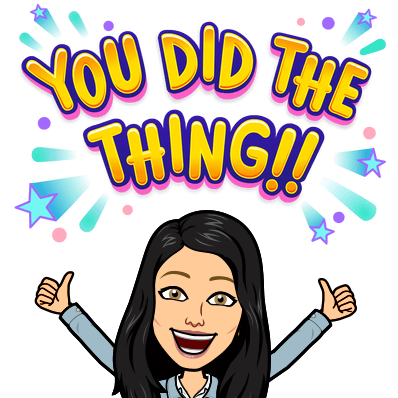

In [1]:
from IPython.display import Image

Image("img/eva-congrats.png")